In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns


In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]

In [4]:
X=np.array(X)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
y = y.astype(np.uint8)
y = np.array(y)
y.shape

(70000,)

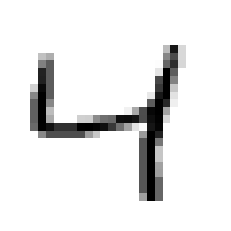

In [6]:
%matplotlib inline
import matplotlib as mpl 
import matplotlib.pyplot as plt 

some_digit = X[2]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap= mpl.cm.binary)
plt.axis("off")
plt.show()

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(random_state=0).fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
log_clf.predict([X[0],X[1],X[2]]) 

array([3, 0, 4], dtype=uint8)

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(log_clf, X_train, y_train, cv=3, scoring="accuracy")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

array([0.9164 , 0.91755, 0.9205 ])

In [12]:
from sklearn.base import BaseEstimator
class NeverClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros(len(X), dtype=uint8)

In [13]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(log_clf, X_train,y_train, cv=5)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

In [14]:
y_train_pred.shape, y_train.shape

((60000,), (60000,))

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,y_train_pred)

array([[5701,    1,   32,   12,   14,   62,   40,   13,   36,   12],
       [   1, 6555,   30,   21,    9,   28,    4,   16,   66,   12],
       [  33,   71, 5334,  105,   72,   29,   80,   75,  134,   25],
       [  21,   30,  146, 5454,    7,  214,   21,   58,  122,   58],
       [  16,   27,   35,   12, 5433,    8,   56,   22,   43,  190],
       [  60,   22,   51,  177,   53, 4746,   98,   23,  139,   52],
       [  34,   19,   51,    1,   49,   83, 5643,    7,   26,    5],
       [  14,   27,   78,   22,   53,   12,    3, 5838,   20,  198],
       [  35,  116,   78,  160,   40,  167,   50,   20, 5107,   78],
       [  24,   32,   20,   78,  156,   34,    3,  181,   50, 5371]])

In [16]:
matrix = confusion_matrix(y_train,y_train_pred)

In [17]:
for i in matrix:
    print(i)
    

[5701    1   32   12   14   62   40   13   36   12]
[   1 6555   30   21    9   28    4   16   66   12]
[  33   71 5334  105   72   29   80   75  134   25]
[  21   30  146 5454    7  214   21   58  122   58]
[  16   27   35   12 5433    8   56   22   43  190]
[  60   22   51  177   53 4746   98   23  139   52]
[  34   19   51    1   49   83 5643    7   26    5]
[  14   27   78   22   53   12    3 5838   20  198]
[  35  116   78  160   40  167   50   20 5107   78]
[  24   32   20   78  156   34    3  181   50 5371]


In [18]:
train_0 = (y_train == 0)
confusion_matrix(train_0, y_train_pred)

array([[ 238, 6899, 5823, 6030, 5872, 5321, 5958, 6240, 5707, 5989],
       [5701,    1,   32,   12,   14,   62,   40,   13,   36,   12],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0]])

In [20]:
train_5 = (y_train == 5)
confusion_matrix(train_5, y_train_pred)

array([[5879, 6878, 5804, 5865, 5833,  637, 5900, 6230, 5604, 5949],
       [  60,   22,   51,  177,   53, 4746,   98,   23,  139,   52],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0]])

In [21]:
matrix

array([[5701,    1,   32,   12,   14,   62,   40,   13,   36,   12],
       [   1, 6555,   30,   21,    9,   28,    4,   16,   66,   12],
       [  33,   71, 5334,  105,   72,   29,   80,   75,  134,   25],
       [  21,   30,  146, 5454,    7,  214,   21,   58,  122,   58],
       [  16,   27,   35,   12, 5433,    8,   56,   22,   43,  190],
       [  60,   22,   51,  177,   53, 4746,   98,   23,  139,   52],
       [  34,   19,   51,    1,   49,   83, 5643,    7,   26,    5],
       [  14,   27,   78,   22,   53,   12,    3, 5838,   20,  198],
       [  35,  116,   78,  160,   40,  167,   50,   20, 5107,   78],
       [  24,   32,   20,   78,  156,   34,    3,  181,   50, 5371]])

In [22]:
confusion_matrix(y_train,y_train_pred).transpose()

array([[5701,    1,   33,   21,   16,   60,   34,   14,   35,   24],
       [   1, 6555,   71,   30,   27,   22,   19,   27,  116,   32],
       [  32,   30, 5334,  146,   35,   51,   51,   78,   78,   20],
       [  12,   21,  105, 5454,   12,  177,    1,   22,  160,   78],
       [  14,    9,   72,    7, 5433,   53,   49,   53,   40,  156],
       [  62,   28,   29,  214,    8, 4746,   83,   12,  167,   34],
       [  40,    4,   80,   21,   56,   98, 5643,    3,   50,    3],
       [  13,   16,   75,   58,   22,   23,    7, 5838,   20,  181],
       [  36,   66,  134,  122,   43,  139,   26,   20, 5107,   50],
       [  12,   12,   25,   58,  190,   52,    5,  198,   78, 5371]])

<function matplotlib.pyplot.show(close=None, block=None)>

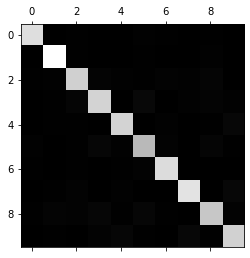

In [23]:
plt.matshow(matrix, cmap=plt.cm.gray)
plt.show

In [24]:
row_sums = matrix.sum(axis=1, keepdims=True)
norm_conf_mx=matrix/row_sums


<function matplotlib.pyplot.show(close=None, block=None)>

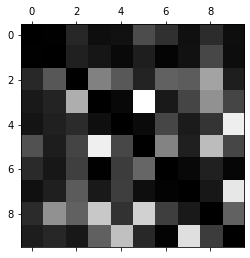

In [25]:
np.fill_diagonal(norm_conf_mx,0) #주대각선만 0으로 채움.
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show

In [26]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

In [27]:

def KK_precision_TF(train, train_pred, column = None ):
    matrix = confusion_matrix(y_train,y_train_pred)
    repeat = len(matrix)
    precision_list = {}
    if column == None:
        column = [i for i in range(repeat)]
    
    for i in range(repeat):
        precision_list[i] = matrix[i][i]/sum(matrix[i])

    return precision_list

def KK_recall_FT(train, train_pred, column = None ):
    matrix = confusion_matrix(y_train,y_train_pred).transpose()
    repeat = len(matrix)
    recall_list = {}
    if column == None:
        column = [i for i in range(repeat)]

    for i in range(repeat):
        recall_list[i] = matrix[i][i]/sum(matrix[i])
    return recall_list


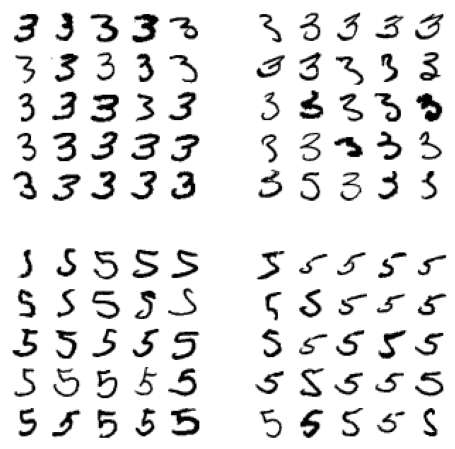

In [28]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5) #3으로 분류된 이미지
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5) #5으로 분류된 이미지
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5) #3으로 분류된 이미지
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5) #5으로 분류된 이미지
plt.show()

In [29]:
KK_precision_TF(y_train,y_train_pred)

{0: 0.9625189937531656,
 1: 0.9722634233165233,
 2: 0.8952668680765358,
 3: 0.8895775566791714,
 4: 0.9299897295446765,
 5: 0.8754842280022136,
 6: 0.9535315985130112,
 7: 0.9318435754189944,
 8: 0.872842249188173,
 9: 0.9028408135821147}

In [30]:
KK_recall_FT(y_train, y_train_pred)

{0: 0.9599259134534434,
 1: 0.95,
 2: 0.9110162254483347,
 3: 0.9026812313803376,
 4: 0.9230377166156982,
 5: 0.881664499349805,
 6: 0.940813604534845,
 7: 0.9336318567087798,
 8: 0.8892564861570608,
 9: 0.8950174970838194}

In [31]:
errors = (y_train_pred != y_train)

In [32]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

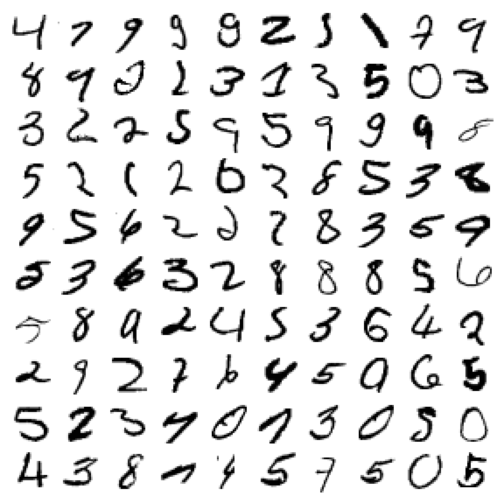

In [33]:
plt.figure(figsize=(9,9))
plot_digits(X_train[errors][:100], images_per_row= 10)
plt.show()

In [34]:
for i in range(len(errors)):
    if errors[i]:
        print(i)

4
17940
17958
17961
17988
17990
18003
18004
18018
18046
18049
18056
18090
18096
18102
18130
18166
18172
18190
18220
18247
18293
18324
18342
18348
18398
18408
18412
18414
18416
18423
18460
18468
18473
18487
18489
18501
18504
18514
18542
18572
18580
18598
18637
18654
18686
18700
18704
18716
18720
18728
18739
18740
18810
18814
18816
18817
18832
18845
18872
18900
18930
18946
18962
18966
18968
18990
19005
19015
19031
19042
19053
19064
19069
19089
19096
19112
19124
19138
19148
19154
19158
19159
19163
19207
19212
19229
19244
19272
19279
19318
19322
19324
19328
19338
19345
19362
19369
19372
19396
19412
19414
19428
19438
19443
19448
19450
19463
19501
19502
19519
19538
19539
19546
19549
19566
19590
19632
19642
19666
19692
19702
19752
19756
19782
19814
19824
19828
19836
19860
19866
19868
19888
19904
19928
19942
19944
19945
19959
19980
19988
20016
20018
20022
20029
20032
20033
20036
20039
20050
20072
20082
20100
20102
20109
20125
20150
20170
20171
20172
20186
20196
20206
20224
20226
20250
20265
20

In [35]:
y_train_pred[18966], y_train[18966]

(5, 7)

In [36]:
some_digit = X_train[18966]

y_scores = log_clf.decision_function([some_digit])
y_scores

array([[ -0.78780801, -10.67467   ,  -3.92193919,   1.24890577,
          4.07635112,   5.8810749 ,  -2.34848175,   4.69987088,
         -1.79581665,   3.62251293]])

In [56]:
threshold = np.array([0.1,0.05,0.1,0.1,0.1,0.1,0.25,0.1,0.1,0.1])

In [38]:
y_scores[0] * threshold

array([-0.0787808 , -0.5337335 , -0.39219392,  0.12489058,  0.40763511,
        0.58810749, -0.58712044,  0.46998709, -0.17958167,  0.36225129])

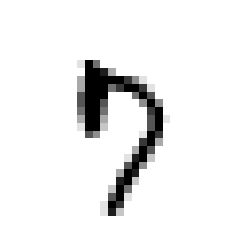

In [39]:
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

음... 음수인데??

<function matplotlib.pyplot.show(close=None, block=None)>

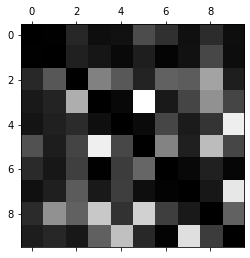

In [72]:
np.fill_diagonal(norm_conf_mx,0) #주대각선만 0으로 채움.
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show

이거보고 변환해보자

3 => 2 5

4 => 9

5 => 3 8

7 => 9

8 => 3 5

9 => 4 7

In [76]:
# 가로 맞다고 햇는데 아님
# 세로 아니라 했는데 맞음
matrix

array([[5701,    1,   32,   12,   14,   62,   40,   13,   36,   12],
       [   1, 6555,   30,   21,    9,   28,    4,   16,   66,   12],
       [  33,   71, 5334,  105,   72,   29,   80,   75,  134,   25],
       [  21,   30,  146, 5454,    7,  214,   21,   58,  122,   58],
       [  16,   27,   35,   12, 5433,    8,   56,   22,   43,  190],
       [  60,   22,   51,  177,   53, 4746,   98,   23,  139,   52],
       [  34,   19,   51,    1,   49,   83, 5643,    7,   26,    5],
       [  14,   27,   78,   22,   53,   12,    3, 5838,   20,  198],
       [  35,  116,   78,  160,   40,  167,   50,   20, 5107,   78],
       [  24,   32,   20,   78,  156,   34,    3,  181,   50, 5371]])

In [127]:
matrix_fixer =np.ones((10, 10), np.float)
matrix_fixer

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [107]:
need_fix= {
    3:[2,5],
    4:[9],
    5:[3,8],
    7:[9],
    8:[3,5],
    9:[4,7]
    }

In [132]:
matrix_fixer

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.21565731, 1.        , 1.        ,
        1.31610044, 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.46454768],
       [1.        , 1.        , 1.        , 1.26222222, 1.        ,
        1.        , 1.        , 1.        , 1.20592593, 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.       

In [131]:
for y, num in need_fix.items():
    for x in num:
        matrix_fixer[y][x] = 1+matrix[y][x]/(sum(matrix[y])-matrix[y][y])


In [40]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train,y_train)

SGDClassifier()

In [41]:
sgd.predict([some_digit])

array([5], dtype=uint8)

In [42]:
some_digit_scores=sgd.decision_function([some_digit])
some_digit_scores

array([[ -5.31785429, -10.6533238 ,  -7.69246578,  -3.35919267,
         -2.09229023,   0.94165263,  -4.62748034,  -0.01967986,
         -5.8633387 ,  -3.47860187]])

In [43]:
np.argmax(some_digit_scores)

5

In [44]:
sgd.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [45]:
sgd.classes_[1]

1

In [46]:
#모든 경우의 수에 대한 이중분류. (0,1)(0,2)(0,3)..(0,9)....(8,9)
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Library/Frameworks/Python.framework/Versions/3.9/lib/p

array([7], dtype=uint8)

In [47]:

len(ovo_clf.estimators_)

45

In [48]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=10,random_state=42)

forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([7], dtype=uint8)

In [49]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.9, 0. , 0.1]])

In [50]:
cross_val_score(sgd,X_train,y_train,cv=3,scoring='accuracy')

array([0.9067 , 0.90425, 0.90825])

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd, X_train_scaled, y_train, cv=3, scoring='accuracy')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([0.8994 , 0.8964 , 0.90725])

## 아 뻘짓햇다 멀티가 따로있다

In [52]:
from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10) 
softmax_reg.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, multi_class='multinomial')

In [53]:
softmax_reg.predict(X_train)[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [54]:
from sklearn.metrics import accuracy_score
y_pred = softmax_reg.predict(X_test)
accuracy_score(y_test, y_pred)

0.9254

다중 분류


In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

In [58]:
X, y = mnist["data"], mnist["target"]

In [59]:
y = y.astype(np.uint8)

In [60]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

In [61]:
enc.fit(y[:,np.newaxis])

<ipython-input-61-78fc683d5810>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  enc.fit(y[:,np.newaxis])


OneHotEncoder()

In [62]:
Y = enc.transform(y[:,np.newaxis]).toarray()

<ipython-input-62-fd377ab0d802>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Y = enc.transform(y[:,np.newaxis]).toarray()


In [63]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], Y[:60000], Y[60000:]

In [64]:
X_train = X_train / 255
X_test = X_test / 255

In [65]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [161]:
def softmax(X, W):
    K = np.size(W, 1)
    A = np.exp(X @ W)
    matrix = confusion_matrix(y_train,y_train_pred)
    for y, num in need_fix.items():
        for x in num:
            A[y][x] = 1+matrix[y][x]/(sum(matrix[y])-matrix[y][y])

    B = np.diag(1 / (np.reshape(A @ np.ones((K,1)), -1)))
    Y = B @ A
    return Y

In [162]:
def compute_cost(X, T, W):
    epsilon = 1e-5
    N = len(T)
    K = np.size(T, 1)
    cost = - (1/N) * np.ones((1,N)) @ (np.multiply(np.log(softmax(X, W) + epsilon), T)) @ np.ones((K,1))
    return cost

In [163]:
def predict(X, W):
    return np.argmax((X @ W), axis=1)

In [164]:
def batch_gd(X, T, W, learning_rate, iterations, batch_size):
    N = len(T)
    cost_history = np.zeros((iterations,1))
    shuffled_indices = np.random.permutation(N)
    X_shuffled = X[shuffled_indices]
    T_shuffled = T[shuffled_indices]

    for i in range(iterations):
        j = i % N
        X_batch = X_shuffled[j:j+batch_size]
        T_batch = T_shuffled[j:j+batch_size]
        # batch가 epoch 경계를 넘어가는 경우, 앞 부분으로 채워줌
        if X_batch.shape[0] < batch_size:
            X_batch = np.vstack((X_batch, X_shuffled[:(batch_size - X_batch.shape[0])]))
            T_batch = np.vstack((T_batch, T_shuffled[:(batch_size - T_batch.shape[0])]))
        W = W - (learning_rate/batch_size) * (X_batch.T @ (softmax(X_batch, W) - T_batch))
        cost_history[i] = compute_cost(X_batch, T_batch, W)
        if i % 1000 == 0:
            print(cost_history[i][0])

    return (cost_history, W)

In [165]:
X = np.hstack((np.ones((np.size(X_train, 0),1)),X_train))
T = y_train

K = np.size(T, 1)
M = np.size(X, 1)
W = np.zeros((M,K))

iterations = 500
learning_rate = 0.01

initial_cost = compute_cost(X, T, W)

print("Initial Cost is: {} \n".format(initial_cost[0][0]))

(cost_history, W_optimal) = batch_gd(X, T, W, learning_rate, iterations, 64)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

In [166]:
## Accuracy
X_ = np.hstack((np.ones((np.size(X_test, 0),1)),X_test))
T_ = y_test
y_pred = predict(X_, W_optimal)
score = float(sum(y_pred == np.argmax(T_, axis=1)))/ float(len(y_test))

print(score)

0.8186


In [ ]:
####################################
X = np.hstack((np.ones((np.size(X_train, 0),1)),X_train))
T = y_train

K = np.size(T, 1)
M = np.size(X, 1)
W = np.zeros((M,K))

##########################

In [137]:

K = np.size(W, 1)
A = np.exp(X @ W)
B = np.diag(1 / (np.reshape(A @ np.ones((K,1)), -1)))
Y = B @ A

KeyboardInterrupt: 

In [159]:
np.size(W, 1)

10

In [160]:
A

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [142]:
np.ones((K,1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [144]:
1 / (np.reshape(A @ np.ones((K,1)), -1))

array([0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1])

In [145]:
(1 / (np.reshape(A @ np.ones((K,1)), -1))).shape

(60000,)

In [147]:
X_

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [148]:
np.diag(1 / (np.reshape(A @ np.ones((K,1)), -1)))

array([[0.1, 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0.1, 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0.1, ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0.1, 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0.1, 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0.1]])

In [157]:
A

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [158]:
B

array([[0.1, 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0.1, 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0.1, ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0.1, 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0.1, 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0.1]])